## 6.2 Exploring relationships

### This script contains the following:

#### 1. Importing Visualization Libraries and Data
#### 2. Data Cleaning
#### 3. Exploring Relationships
     Correlations
     Scatterplots
     Pair Plots
     Categorical Plots

## 1. Importing Visualization Libraries and Data

In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import scipy
from datetime import datetime

In [2]:
path= r'C:\Users\abdul\Career-Foundry-Assignment4-Instacart-Basket-Analysis'

In [3]:
df=pd.read_csv(os.path.join(path, '02_Data','Prepared-Data', 'airport_clean.csv'))

In [4]:
df.head()

,Unnamed: 0,Origin_airport,Destination_airport,Origin_city,Destination_city,Passengers,Seats,Flights,Distance,Fly_date,Origin_population,Destination_population,Org_airport_lat,Org_airport_long,Dest_airport_lat,Dest_airport_long
0,1,EUG,RDM,"Eugene, OR","Bend, OR",41,396,22,103,1990-11-01,284093,76034,44.124599,-123.211998,44.254101,-121.150002
1,2,EUG,RDM,"Eugene, OR","Bend, OR",88,342,19,103,1990-12-01,284093,76034,44.124599,-123.211998,44.254101,-121.150002
2,3,EUG,RDM,"Eugene, OR","Bend, OR",11,72,4,103,1990-10-01,284093,76034,44.124599,-123.211998,44.254101,-121.150002
3,4,MFR,RDM,"Medford, OR","Bend, OR",0,18,1,156,1990-02-01,147300,76034,42.374199,-122.873001,44.254101,-121.150002
4,5,MFR,RDM,"Medford, OR","Bend, OR",11,18,1,156,1990-03-01,147300,76034,42.374199,-122.873001,44.254101,-121.150002


In [5]:
df.dtypes

Unnamed: 0                  int64
Origin_airport             object
Destination_airport        object
Origin_city                object
Destination_city           object
Passengers                  int64
Seats                       int64
Flights                     int64
Distance                    int64
Fly_date                   object
Origin_population           int64
Destination_population      int64
Org_airport_lat           float64
Org_airport_long          float64
Dest_airport_lat          float64
Dest_airport_long         float64
dtype: object

In [6]:
df.describe()

,Unnamed: 0,Passengers,Seats,Flights,Distance,Origin_population,Destination_population,Org_airport_lat,Org_airport_long,Dest_airport_lat,Dest_airport_long
count,3.594452e+06,3.594452e+06,3.594452e+06,3.594452e+06,3.594452e+06,3.594452e+06,3.594452e+06,3.594452e+06,3.594452e+06,3.594452e+06,3.594452e+06
mean,1.803850e+06,2.697282e+03,4.060333e+03,3.726318e+01,6.988670e+02,5.878793e+06,5.905220e+06,3.774678e+01,-9.184731e+01,3.773742e+01,-9.181861e+01
std,1.041502e+06,4.352505e+03,6.207650e+03,4.961086e+01,6.044111e+02,7.855559e+06,7.903573e+06,5.761101e+00,1.653185e+01,5.732390e+00,1.646617e+01
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.300500e+04,1.300500e+04,1.972140e+01,-1.579220e+02,1.972140e+01,-1.579220e+02
25%,9.011388e+05,1.100000e+02,1.600000e+02,2.000000e+00,2.760000e+02,1.034971e+06,1.029829e+06,3.363670e+01,-9.703800e+01,3.363670e+01,-9.703800e+01
50%,1.803964e+06,1.129000e+03,2.016000e+03,2.500000e+01,5.230000e+02,2.404273e+06,2.404273e+06,3.885210e+01,-8.775240e+01,3.885210e+01,-8.775240e+01
75%,2.706310e+06,3.514000e+03,5.400000e+03,5.500000e+01,9.270000e+02,8.635706e+06,8.653794e+06,4.173260e+01,-8.029060e+01,4.173260e+01,-8.029060e+01
max,3.606801e+06,8.959700e+04,1.470620e+05,1.128000e+03,5.095000e+03,3.813959e+07,3.813959e+07,6.483750e+01,-6.882810e+01,6.483750e+01,-6.882810e+01


In [7]:
#Rename a first column as Index
df=df.rename(columns={'Unnamed: 0':'Index'})

In [8]:
df.columns

Index(['Index', 'Origin_airport', 'Destination_airport', 'Origin_city',
       'Destination_city', 'Passengers', 'Seats', 'Flights', 'Distance',
       'Fly_date', 'Origin_population', 'Destination_population',
       'Org_airport_lat', 'Org_airport_long', 'Dest_airport_lat',
       'Dest_airport_long'],
      dtype='object')

In [9]:
matplotlib.__version__

'3.4.2'

## 2. Data Cleaning

### 2.1 Missing values check

In [10]:
df.isnull().sum()

Index                     0
Origin_airport            0
Destination_airport       0
Origin_city               0
Destination_city          0
Passengers                0
Seats                     0
Flights                   0
Distance                  0
Fly_date                  0
Origin_population         0
Destination_population    0
Org_airport_lat           0
Org_airport_long          0
Dest_airport_lat          0
Dest_airport_long         0
dtype: int64

### 2.2 Duplicates Check

In [11]:
# Check for duplicates
df_dups=df[df.duplicated()]

In [12]:
df_dups.shape # no duplicates

(0, 16)

### 2.3 Checking for mixed data types

In [13]:
# Check for mixed types
for col in df.columns.tolist():
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df[weird]) > 0:
    print (col, ':mix')
  else: print(col, ':consistent')
# No mixed-type columns either!

Index :consistent
Origin_airport :consistent
Destination_airport :consistent
Origin_city :consistent
Destination_city :consistent
Passengers :consistent
Seats :consistent
Flights :consistent
Distance :consistent
Fly_date :consistent
Origin_population :consistent
Destination_population :consistent
Org_airport_lat :consistent
Org_airport_long :consistent
Dest_airport_lat :consistent
Dest_airport_long :consistent


###  2.4 Converting the Fly_date column into  Fly_year, Fly_month, Fly_day

In [14]:
# Convert the date column to a datetime object
df['date'] = pd.to_datetime(df['Fly_date'])

# Extract the year, month, and day components into separate columns
df['Fly_year'] = df['date'].apply(lambda x: x.strftime('%Y'))
df['Fly_month'] = df['date'].apply(lambda x: x.strftime('%m'))
df['Fly_day'] = df['date'].apply(lambda x: x.strftime('%d'))
df['Fly_year_month'] = df['date'].apply(lambda x: x.strftime('%Y-%m'))
# convert the year_month column to a datetime type
#df['Fly_year_month'] = pd.to_datetime(df['Fly_year_month'], format='%Y-%m')

In [15]:
df.columns

Index(['Index', 'Origin_airport', 'Destination_airport', 'Origin_city',
       'Destination_city', 'Passengers', 'Seats', 'Flights', 'Distance',
       'Fly_date', 'Origin_population', 'Destination_population',
       'Org_airport_lat', 'Org_airport_long', 'Dest_airport_lat',
       'Dest_airport_long', 'date', 'Fly_year', 'Fly_month', 'Fly_day',
       'Fly_year_month'],
      dtype='object')

In [16]:
df=df.drop(columns='date')

In [17]:
df.columns

Index(['Index', 'Origin_airport', 'Destination_airport', 'Origin_city',
       'Destination_city', 'Passengers', 'Seats', 'Flights', 'Distance',
       'Fly_date', 'Origin_population', 'Destination_population',
       'Org_airport_lat', 'Org_airport_long', 'Dest_airport_lat',
       'Dest_airport_long', 'Fly_year', 'Fly_month', 'Fly_day',
       'Fly_year_month'],
      dtype='object')

In [18]:
df.head()

,Index,Origin_airport,Destination_airport,Origin_city,Destination_city,Passengers,Seats,Flights,Distance,Fly_date,Origin_population,Destination_population,Org_airport_lat,Org_airport_long,Dest_airport_lat,Dest_airport_long,Fly_year,Fly_month,Fly_day,Fly_year_month
0,1,EUG,RDM,"Eugene, OR","Bend, OR",41,396,22,103,1990-11-01,284093,76034,44.124599,-123.211998,44.254101,-121.150002,1990,11,01,1990-11
1,2,EUG,RDM,"Eugene, OR","Bend, OR",88,342,19,103,1990-12-01,284093,76034,44.124599,-123.211998,44.254101,-121.150002,1990,12,01,1990-12
2,3,EUG,RDM,"Eugene, OR","Bend, OR",11,72,4,103,1990-10-01,284093,76034,44.124599,-123.211998,44.254101,-121.150002,1990,10,01,1990-10
3,4,MFR,RDM,"Medford, OR","Bend, OR",0,18,1,156,1990-02-01,147300,76034,42.374199,-122.873001,44.254101,-121.150002,1990,02,01,1990-02
4,5,MFR,RDM,"Medford, OR","Bend, OR",11,18,1,156,1990-03-01,147300,76034,42.374199,-122.873001,44.254101,-121.150002,1990,03,01,1990-03


In [19]:
df.dtypes

Index                       int64
Origin_airport             object
Destination_airport        object
Origin_city                object
Destination_city           object
Passengers                  int64
Seats                       int64
Flights                     int64
Distance                    int64
Fly_date                   object
Origin_population           int64
Destination_population      int64
Org_airport_lat           float64
Org_airport_long          float64
Dest_airport_lat          float64
Dest_airport_long         float64
Fly_year                   object
Fly_month                  object
Fly_day                    object
Fly_year_month             object
dtype: object

In [20]:
df['Fly_year'] = df['Fly_year'].astype(int)
df['Fly_month'] = df['Fly_month'].astype(int)
df['Fly_day'] = df['Fly_day'].astype(int)
#df['Fly_year_month'] = df['Fly_year_month'].astype(datetime.datetime)

In [21]:
df.dtypes

Index                       int64
Origin_airport             object
Destination_airport        object
Origin_city                object
Destination_city           object
Passengers                  int64
Seats                       int64
Flights                     int64
Distance                    int64
Fly_date                   object
Origin_population           int64
Destination_population      int64
Org_airport_lat           float64
Org_airport_long          float64
Dest_airport_lat          float64
Dest_airport_long         float64
Fly_year                    int32
Fly_month                   int32
Fly_day                     int32
Fly_year_month             object
dtype: object

In [22]:
# Create a subset excluding the Qualitative columns
sub=df[['Passengers', 'Seats', 'Flights', 'Distance','Origin_population',
       'Destination_population', 'Fly_year', 'Fly_month','Fly_year_month']]


## 3. Exploring Relationships

### 3.1 Correlations

In [23]:
# Create a correlation matrix using pandas
sub.corr()

,Passengers,Seats,Flights,Distance,Origin_population,Destination_population,Fly_year,Fly_month
Passengers,1.000000,0.969835,0.814360,0.120084,0.102462,0.099499,-0.035028,0.006065
Seats,0.969835,1.000000,0.851569,0.072675,0.102446,0.099156,-0.097798,-0.001425
Flights,0.814360,0.851569,1.000000,-0.078518,0.061400,0.058233,-0.024319,0.001974
Distance,0.120084,0.072675,-0.078518,1.000000,0.184732,0.162788,0.036938,0.004366
Origin_population,0.102462,0.102446,0.061400,0.184732,1.000000,-0.013769,0.001021,-0.001654
Destination_population,0.099499,0.099156,0.058233,0.162788,-0.013769,1.000000,0.001253,-0.001013
Fly_year,-0.035028,-0.097798,-0.024319,0.036938,0.001021,0.001253,1.000000,0.003552
Fly_month,0.006065,-0.001425,0.001974,0.004366,-0.001654,-0.001013,0.003552,1.000000


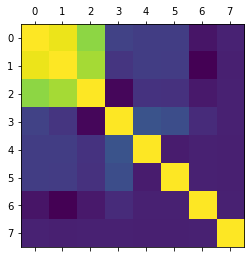

In [24]:
# Create a Correlation heat map with matplotlib
plt.matshow(sub.corr())
plt.show()

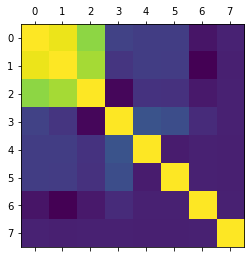

In [25]:
# save figure
plt.matshow(sub.corr())
plt.savefig('correlation_heatmap.png')
# This will save the image in the working directory. 
#If you don't know what this directory is the next line will show you how to check

In [26]:
# current directory
cwd=os.getcwd()
cwd

'C:\\Users\\abdul\\Career-Foundry-Assignment4-Instacart-Basket-Analysis\\03 Scripts'

Text(0.5, 1.0, 'Correlation Matrix')

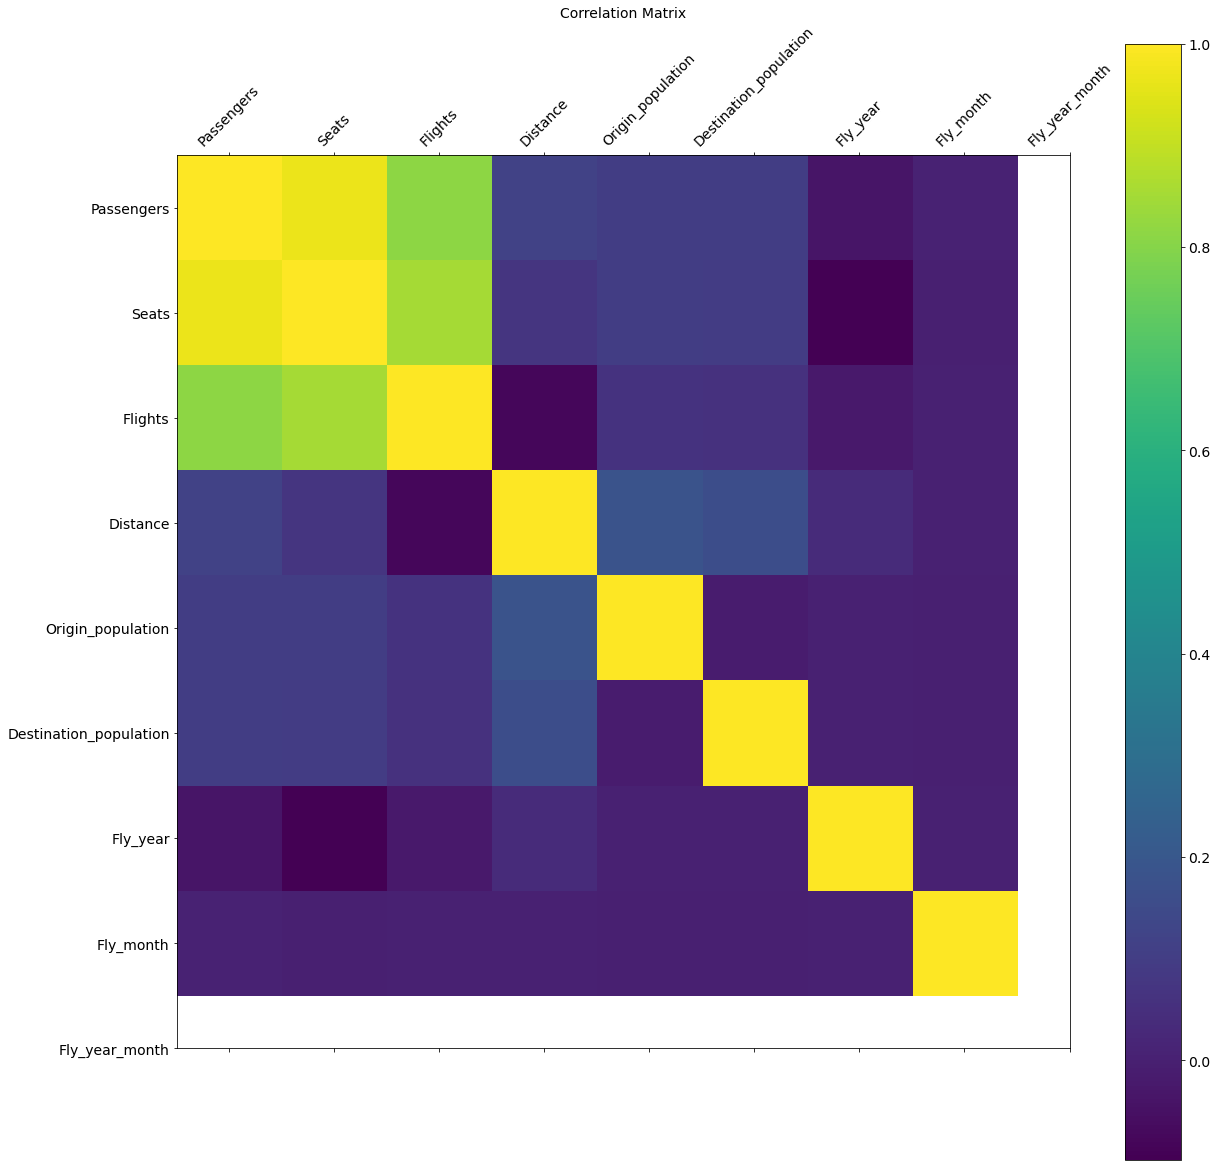

In [27]:
# Add labels, a legend, and change the size of the heatmap
f=plt.figure(figsize=(20,20)) # figure size
plt.matshow(sub.corr(), fignum=f.number) # type of plot
plt.xticks(range(sub.shape[1]), sub.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(sub.shape[1]), sub.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

### 3.2 Create a correlation heatmap using seaborn:

In [28]:
sub.head()

,Passengers,Seats,Flights,Distance,Origin_population,Destination_population,Fly_year,Fly_month,Fly_year_month
0,41,396,22,103,284093,76034,1990,11,1990-11
1,88,342,19,103,284093,76034,1990,12,1990-12
2,11,72,4,103,284093,76034,1990,10,1990-10
3,0,18,1,156,147300,76034,1990,2,1990-02
4,11,18,1,156,147300,76034,1990,3,1990-03


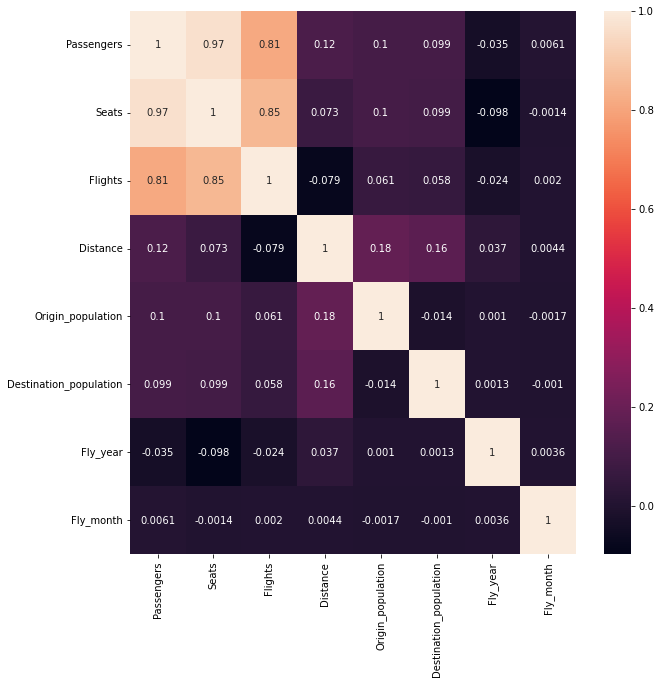

In [29]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

### 3.3 Scatter plots

In [30]:
# Create a scatterplot for the "house age" and "price per unit" columns in seaborn

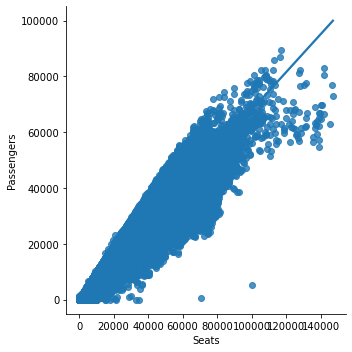

In [31]:
sns.lmplot(x = 'Seats', y = 'Passengers', data = sub)

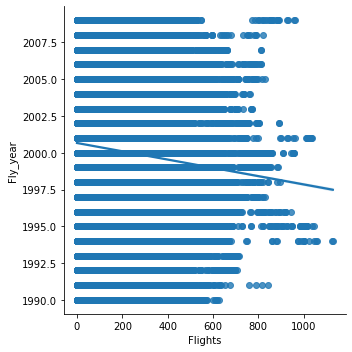

In [32]:
sns.lmplot(x = 'Flights', y = 'Fly_year', data = sub)

In [33]:
#sns.lmplot(x = 'Flights', y = 'Fly_year_month', data = sub)

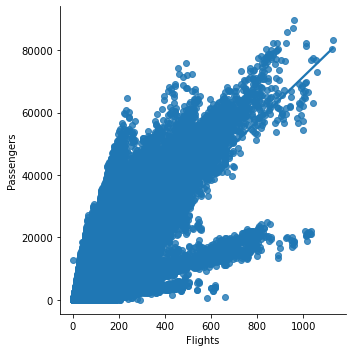

In [34]:
sns.lmplot(x = 'Flights', y = 'Passengers', data = sub)

### 3.4 Pair plots

In [35]:
# Keep only the variables you want to use in the pair plot

sub_2 = sub[['Passengers', 'Seats', 'Flights', 'Distance', 'Fly_year', 'Fly_year_month']]

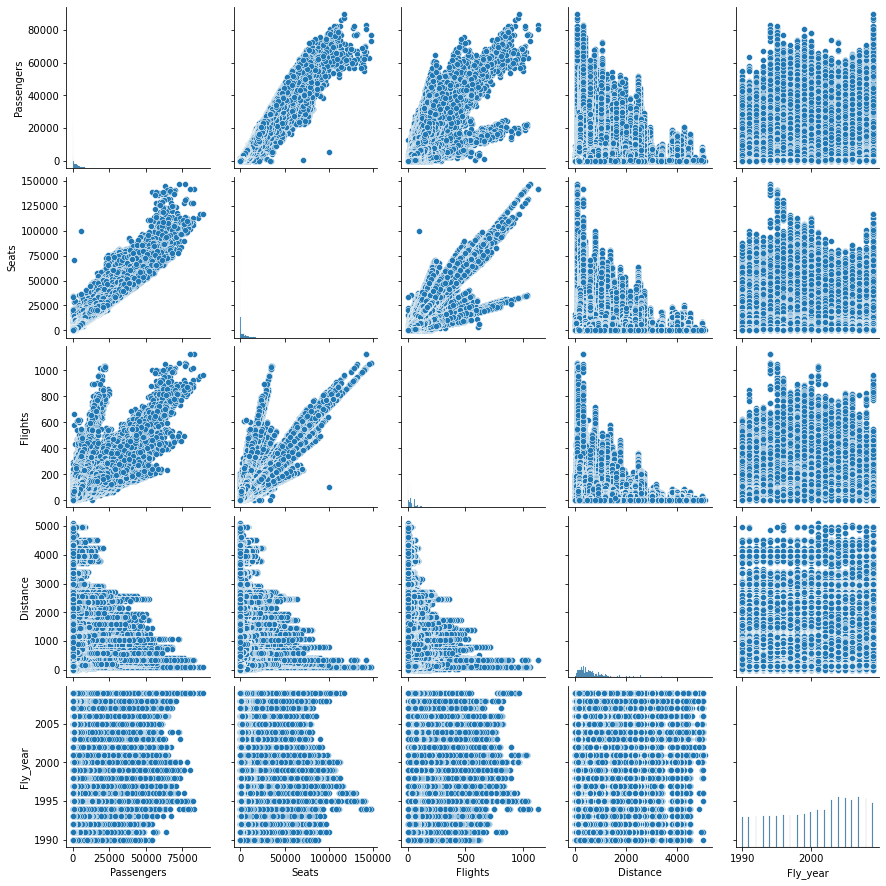

In [36]:
# Create a pair plot 

g = sns.pairplot(sub_2)

### 3.5 Categorical Plots:¶

##### Creating a categorical variable that splits the "Passengers" column into categories

<AxesSubplot:xlabel='Passengers', ylabel='Count'>

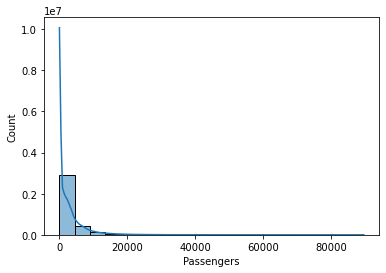

In [37]:
# Use a histogram to visualize the distribution of the variables. 
# This way, you can determine sensible categories for the price ranges. 
# You don't want to end up with too few observations in any one of the categories.
# The argument "kde" add a line that encompasses the distribution

sns.histplot(sub['Passengers'], bins = 20, kde = True)

<AxesSubplot:xlabel='Flights', ylabel='Count'>

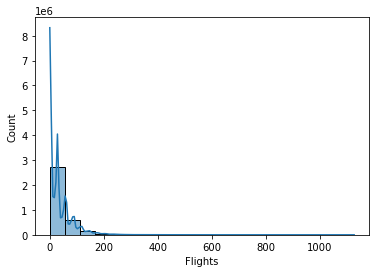

In [38]:
sns.histplot(sub['Flights'], bins = 20, kde = True)

<AxesSubplot:xlabel='Distance', ylabel='Count'>

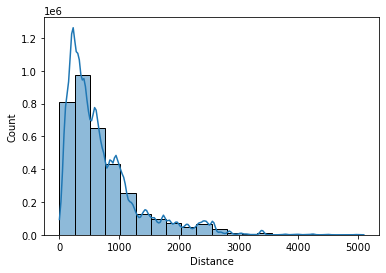

In [39]:
sns.histplot(sub['Distance'], bins = 20, kde = True)

<AxesSubplot:xlabel='Seats', ylabel='Count'>

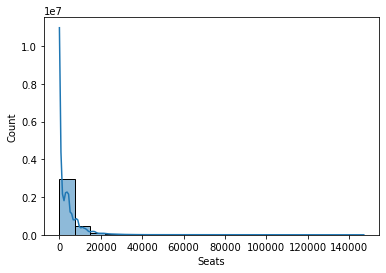

In [40]:
sns.histplot(sub['Seats'], bins = 20, kde = True)

<AxesSubplot:xlabel='Fly_year', ylabel='Count'>

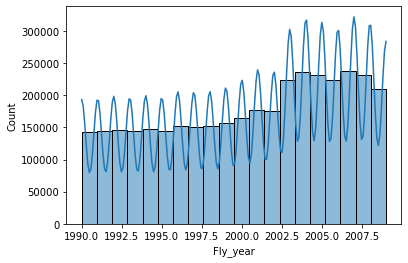

In [41]:
sns.histplot(sub['Fly_year'], bins = 20, kde = True)

<AxesSubplot:xlabel='Fly_year_month', ylabel='Count'>

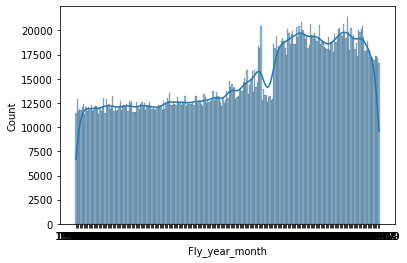

In [42]:
sns.histplot(sub['Fly_year_month'], bins = 20, kde = True)

In [43]:
df.loc[df['Distance'] < 500, 'Distance_Category'] = 'Short Distance'

In [44]:
df.loc[(df['Distance'] >= 500) & (df['Distance'] < 2000), 'Distance_Category'] = 'Medium Distance'

In [45]:
df.loc[df['Distance'] >= 2000, 'Distance_Category'] = 'Long Distance'

In [46]:
df['Distance_Category'].value_counts()

Short Distance     1741891
Medium Distance    1666115
Long Distance       186446
Name: Distance_Category, dtype: int64

In [47]:
df.columns

Index(['Index', 'Origin_airport', 'Destination_airport', 'Origin_city',
       'Destination_city', 'Passengers', 'Seats', 'Flights', 'Distance',
       'Fly_date', 'Origin_population', 'Destination_population',
       'Org_airport_lat', 'Org_airport_long', 'Dest_airport_lat',
       'Dest_airport_long', 'Fly_year', 'Fly_month', 'Fly_day',
       'Fly_year_month', 'Distance_Category'],
      dtype='object')

In [48]:
df.loc[df['Fly_year'] < 1995, 'Fly_year_Category'] = '1990-1994'

In [49]:
df.loc[(df['Fly_year'] >= 1995) & (df['Fly_year'] < 2002), 'Fly_year_Category'] = '1995-2001'

In [50]:
df.loc[df['Fly_year'] >= 2002, 'Fly_year_Category'] = '2002-2009'

In [51]:
df['Fly_year_Category'].value_counts()

2002-2009    1769103
1995-2001    1099806
1990-1994     725543
Name: Fly_year_Category, dtype: int64

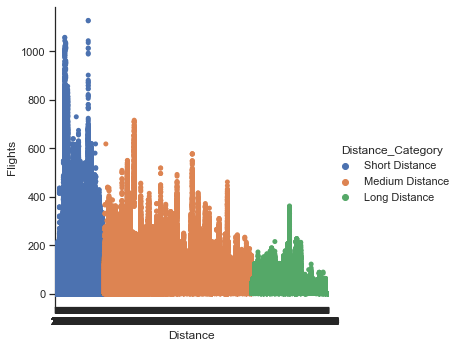

In [52]:
# Create a categorical plot in seaborn using the Distance categories created above

sns.set(style="ticks")
g = sns.catplot(x="Distance", y="Flights", hue="Distance_Category", data=df)

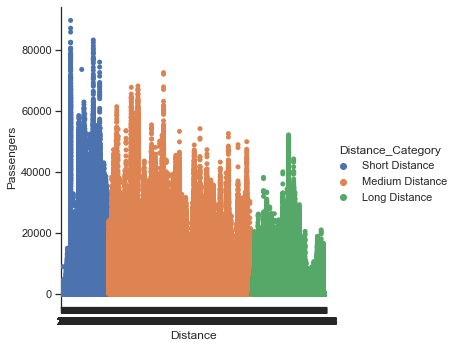

In [53]:
# Create a categorical plot in seaborn using the distance categories created above
sns.set(style="ticks")
g = sns.catplot(x="Distance", y="Passengers", hue="Distance_Category", data=df)

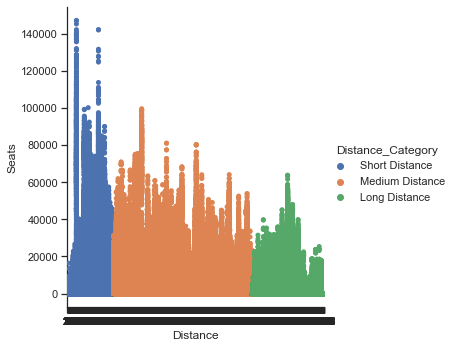

In [54]:
# Create a categorical plot in seaborn using the Distance categories created above
sns.set(style="ticks")
g = sns.catplot(x="Distance", y="Seats", hue="Distance_Category", data=df)

C:\Users\abdul\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  self._figure.tight_layout(*args, **kwargs)


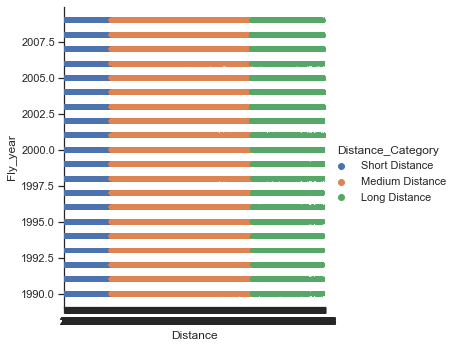

In [55]:
# Create a categorical plot in seaborn using the Distance categories created above

sns.set(style="ticks")
g1 = sns.catplot(x="Distance", y="Fly_year", hue="Distance_Category", data=df)

C:\Users\abdul\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  self._figure.tight_layout(*args, **kwargs)


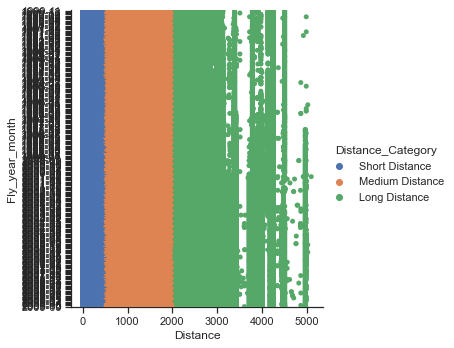

In [56]:
# Create a categorical plot in seaborn using the Distance categories created above

sns.set(style="ticks")
g2 = sns.catplot(x="Distance", y="Fly_year_month", hue="Distance_Category", data=df)

C:\Users\abdul\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  self._figure.tight_layout(*args, **kwargs)


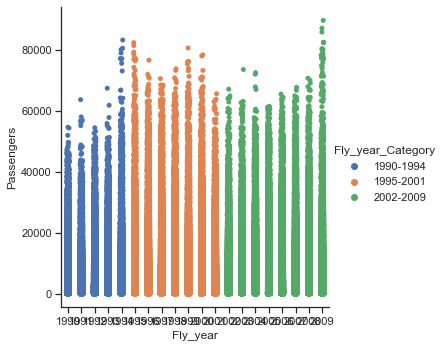

In [57]:
# Create a categorical plot in seaborn using the fly year categories created above
sns.set(style="ticks")
g = sns.catplot(x="Fly_year", y="Passengers", hue="Fly_year_Category", data=df)

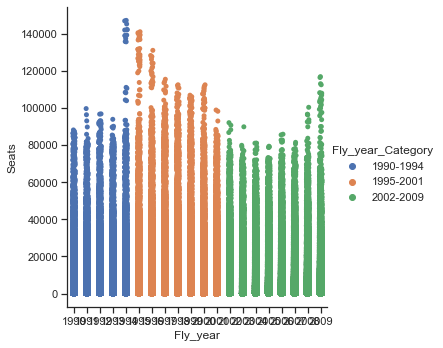

In [58]:
# Create a categorical plot in seaborn using the fly year categories created above
sns.set(style="ticks")
g = sns.catplot(x="Fly_year", y="Seats", hue="Fly_year_Category", data=df)

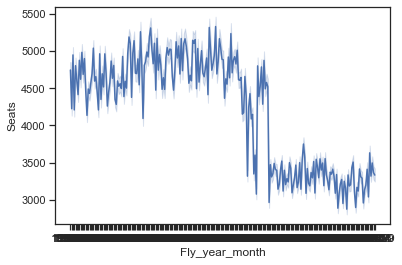

In [59]:
line1= sns.lineplot(data=df, x='Fly_year_month', y='Seats')

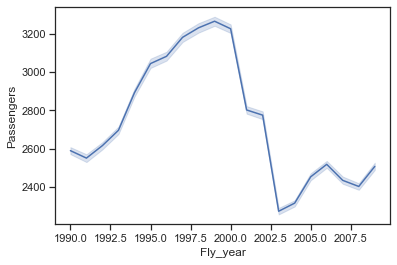

In [60]:
line2= sns.lineplot(data=df, x='Fly_year', y='Passengers')

In [61]:
df.head()

,Index,Origin_airport,Destination_airport,Origin_city,Destination_city,Passengers,Seats,Flights,Distance,Fly_date,...,Org_airport_lat,Org_airport_long,Dest_airport_lat,Dest_airport_long,Fly_year,Fly_month,Fly_day,Fly_year_month,Distance_Category,Fly_year_Category
0,1,EUG,RDM,"Eugene, OR","Bend, OR",41,396,22,103,1990-11-01,...,44.124599,-123.211998,44.254101,-121.150002,1990,11,1,1990-11,Short Distance,1990-1994
1,2,EUG,RDM,"Eugene, OR","Bend, OR",88,342,19,103,1990-12-01,...,44.124599,-123.211998,44.254101,-121.150002,1990,12,1,1990-12,Short Distance,1990-1994
2,3,EUG,RDM,"Eugene, OR","Bend, OR",11,72,4,103,1990-10-01,...,44.124599,-123.211998,44.254101,-121.150002,1990,10,1,1990-10,Short Distance,1990-1994
3,4,MFR,RDM,"Medford, OR","Bend, OR",0,18,1,156,1990-02-01,...,42.374199,-122.873001,44.254101,-121.150002,1990,2,1,1990-02,Short Distance,1990-1994
4,5,MFR,RDM,"Medford, OR","Bend, OR",11,18,1,156,1990-03-01,...,42.374199,-122.873001,44.254101,-121.150002,1990,3,1,1990-03,Short Distance,1990-1994


In [63]:
df.to_csv(os.path.join(path,'02_Data','Prepared-Data','airport_clean_updated.csv' ))

In [64]:
df.to_pickle(os.path.join(path,'02_Data','Prepared-Data','airport_clean_updated.pkl' ))